---
# DS3000A - DS9000A Final Exam

## Student ID #: XXXXXXXXX

## Grade: __ / 100 + 10 Bonus

## General Comments

-   This exam integrates knowledge and skills acquired in the whole term. You are allowed to use any document and source on your computer and the internet, but you are NOT allowed to share documents, post questions to online forums, or communicate in any way with people inside or outside the class. 

-   Having any document sharing or communication tool (e.g. Discord, Teams, Outlook, Google Drive etc.), either web-based or app-based, open on your laptop (or running in the background) is considered act of cheating and you will receive 0 pts for the exam.

-   To finish the midterm in the alloted time, you will have to work efficiently. Read the entirety of each question carefully.

-   You need to submit your final notebook by 1:00PM on OWL to the Test and Quizzes section, this is the same place where you downloaded the empty notebook and data. Late submission will be scored with 0 pts. To avoid technical difficulties, start your submission, at the latest, five to ten minutes before the deadline.  

-   Some questions demand a **written answer** - answer these in full English sentences in markdown cells. 

-   For your figures, ensure that all axes are labeled in an informative way. There might be a situation where you should limit the x-axis and/or the y-axis to zoom-in for interpretation.

-   Ensure that your code runs correctly by choosing "Kernel -> Restart and Run All" before submitting to OWL. 

## Additional Guidance

-   If at any point you are asking yourself "are we supposed to...", write your assumptions clearly and proceed according to those assumptions.
-   If you have no clue how to approach a question, skip it and move on. Revisit the skipped one(s) after you are done with the rest.

---
## Preliminaries
Feel free to add stuff.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, RidgeCV, SGDClassifier
from sklearn.ensemble import RandomForestRegressor

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense

seed=1220
np.random.seed(seed)

import warnings 
warnings.filterwarnings('ignore')

---
## Question 1 - <span style="color:green">[60]</span> - Model Selection 
You are going to work on a dataset listing the soccer players participated in the 2022 FIFA World Cup. Our ultimate goal is to find the best ML model (amongst four candidates) that can best predict a player's monetary value. The dataset has the following attributes:
- `Age`: Player age in years
- `Nationality`: Players nationality
- `Overall`: Player overall performance score (higher better)
- `Potential`: Player potential score (higher better)
- `Club`: Player home soccer club
- `Value`: Player value *i.e*, the amount of money in euros a club should pay in order to purchase the player (higher better)
- `Wage`: Player stipend in euros (higher better)
- `Preferred Foot`: Player preferred foot to play
- `International Reputation`: Player international fame (higher better)
- `Week Foot`: Performance score of player weak foot (higher better)
- `Skill Moves`: Player move skill score (higher better)
- `Body Type`: Player body type
- `Position`: Position player holds on the pitch
- `Height`: Player height in centimeters
- `Weight`: Player weight in kilograms

Q 1.1 - <span style="color:red">[0.5]</span> - Load `dataset_1.csv` as a pandas dataframe, name it `data`, and display its first 5 rows.

In [2]:
data = pd.read_csv('dataset_1.csv')

data.head(5)

,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Position,Height,Weight
0,27,Portugal,86,87,Manchester United,78500000.0,190000.0,Right,3.0,3.0,4.0,Stocky,Middle,179,69
1,30,Argentina,85,85,Sevilla FC,46500000.0,46000.0,Left,2.0,3.0,3.0,Stocky,Back,172,69
2,31,Belgium,91,91,Manchester City,107500000.0,350000.0,Right,4.0,5.0,4.0,Stocky,Middle,181,70
3,25,Italy,86,89,Inter,89500000.0,110000.0,Right,3.0,3.0,3.0,Normal,Middle,172,68
4,27,Germany,89,90,FC Bayern München,105500000.0,130000.0,Right,4.0,4.0,3.0,Normal,Middle,177,75


Q 1.2 - <span style="color:red">[1]</span> - Code to answer the following questions:
-   Does the data contain any missing value(s)? How do you take care of them? <span style="color:red">[0.5]</span>
-   Do you see any suspicious value(s) in the statistical summary of the data? If so, explain why suspicious and take care of them properly? <span style="color:red">[0.5]</span>

In [3]:
print(f"Any null values? {data.isnull().any().any()}")

data.describe()

Any null values? False


,Age,Overall,Potential,Value,Wage,International Reputation,Weak Foot,Skill Moves,Height,Weight
count,4903.000000,4903.000000,4903.000000,4.903000e+03,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000,4903.000000
mean,25.751581,69.188864,73.407098,5.931980e+06,15037.344483,1.210891,2.992046,2.514787,181.053437,75.154803
std,4.483194,7.005289,6.593820,1.271123e+07,29897.342606,0.572371,0.689830,0.804754,6.979453,7.048869
min,16.000000,47.000000,51.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,156.000000,49.000000
25%,22.000000,64.000000,69.000000,7.750000e+05,1000.000000,1.000000,3.000000,2.000000,176.000000,70.000000
50%,25.000000,69.000000,73.000000,1.700000e+06,4000.000000,1.000000,3.000000,2.000000,181.000000,75.000000
75%,29.000000,74.000000,78.000000,4.500000e+06,16000.000000,1.000000,3.000000,3.000000,186.000000,80.000000
max,44.000000,91.000000,95.000000,1.905000e+08,450000.000000,5.000000,5.000000,5.000000,206.000000,102.000000


Q 1.3 - <span style="color:red">[2]</span> - The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of $kg/m^2$. With this knowledge, see if you can do some meaningful feature extraction? 

In [4]:
data['BMI'] = data['Weight'] / ((data['Height'] / 100)**2)
data.drop(['Weight', 'Height'], axis=1, inplace=True)

Q 1.4 - <span style="color:red">[4]</span> - Use `sns.jointplot` to investigate the following relationships and apply proper transformations where needed:
- Value vs. Wage
- Value vs. Overall
- Wage vs. Overall
- Value vs. Potential
- Wage vs. Potential

Note: Where transformation is needed, use `sns.jointplot` twice (*i.e.*, before and after transformation).

Hint: Where transformation is needed, replace the original values of the attribute in the dataset with their transformed version.  

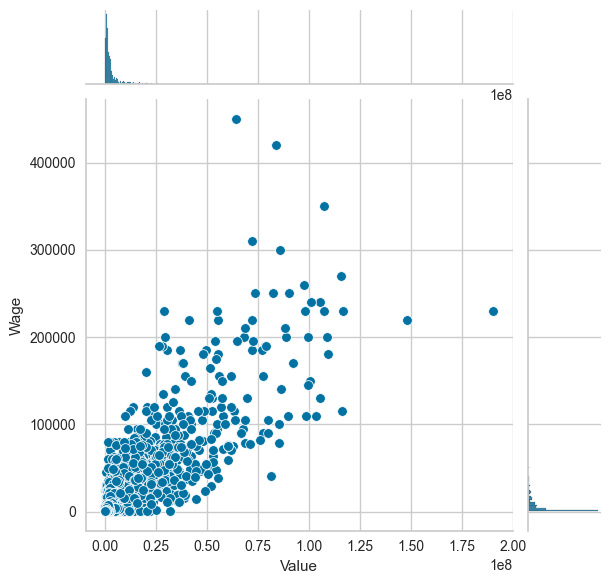

In [5]:
sns.jointplot(x=data['Value'], y=data['Wage'], marginal_ticks=False)

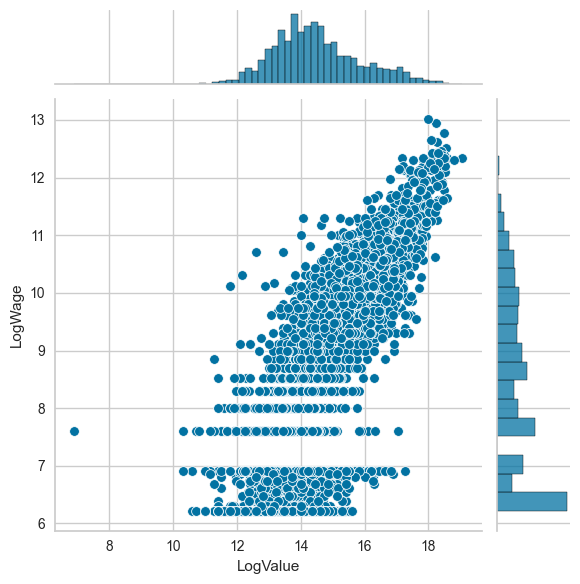

In [8]:
data['LogValue'] = np.log(data['Value'])
data['LogWage'] = np.log(data['Wage'])

sns.jointplot(x=data['LogValue'], y=data['LogWage'], marginal_ticks=False)

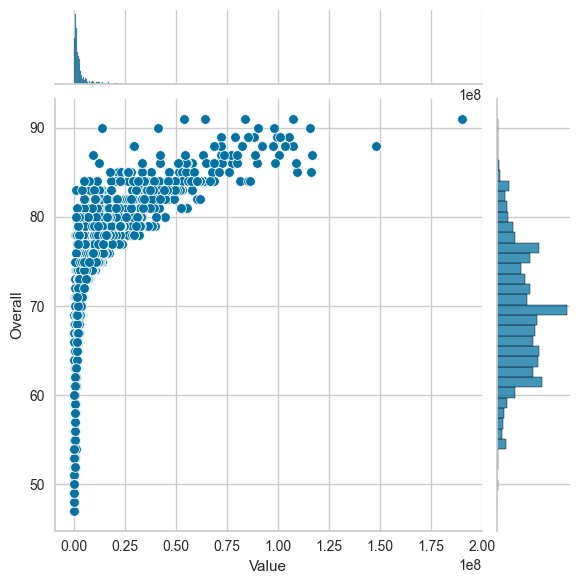

In [6]:
sns.jointplot(x=data['Value'], y=data['Overall'], marginal_ticks=False)

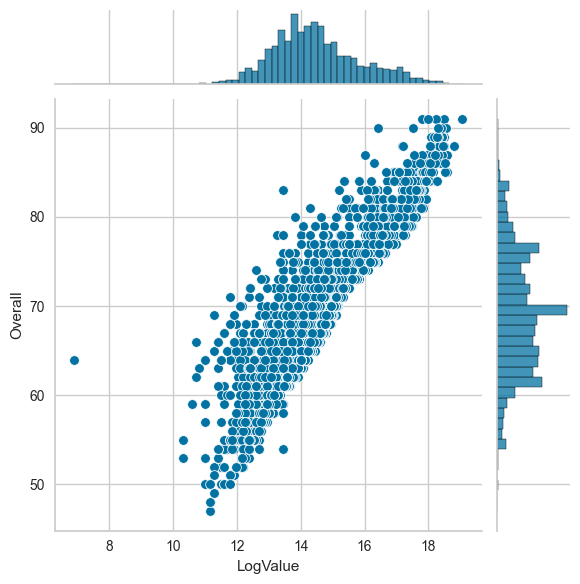

In [23]:
sns.jointplot(x=data['LogValue'], y=data['Overall'], marginal_ticks=False)

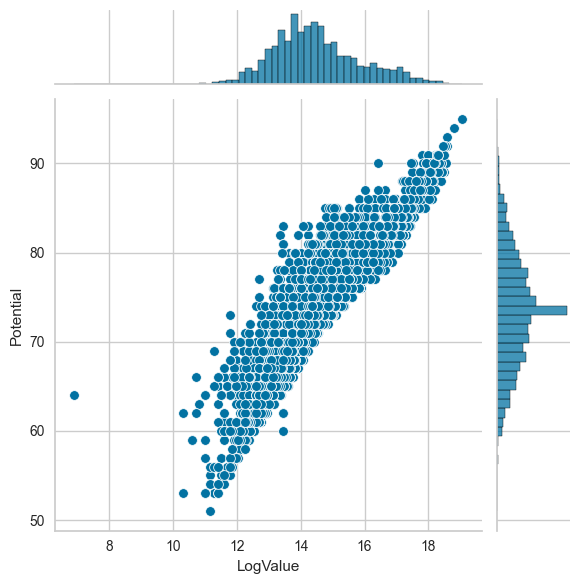

In [26]:
sns.jointplot(x=data['LogValue'], y=data['Potential'], marginal_ticks=False)

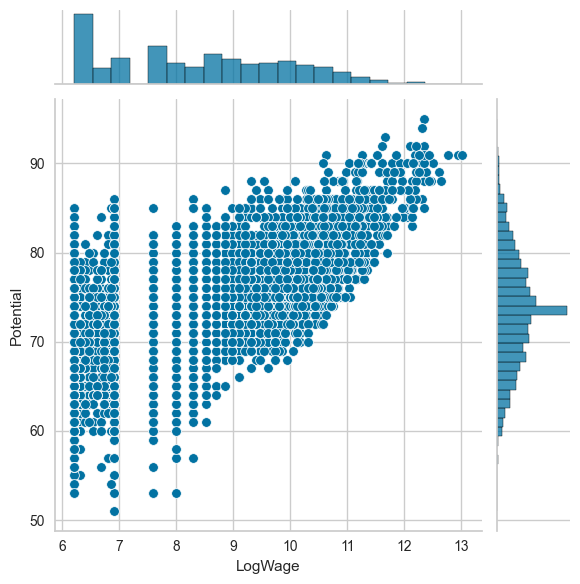

In [27]:
sns.jointplot(x=data['LogWage'], y=data['Potential'], marginal_ticks=False)

Q 1.5 - <span style="color:red">[2]</span> - Output a table reporting in descending format the correlations between the numerical features and target.  

In [9]:
D = data.drop(['Value', 'Wage'], axis=1, inplace=False)
c = D.select_dtypes(include=np.number).corr()
print("Correlations between features and target (i.e., LogValue) are:")
print(c["LogValue"].sort_values(ascending=False).round(2))

Correlations between features and target (i.e., LogValue) are:
LogValue                    1.00
Overall                     0.91
Potential                   0.90
LogWage                     0.79
International Reputation    0.46
Skill Moves                 0.38
Weak Foot                   0.23
Age                         0.01
BMI                         0.00
Name: LogValue, dtype: float64


Q 1.6 - <span style="color:red">[6]</span> - Code the following:
-   use pandas `get_dummies` to take care of the categorical variables, if any, <span style="color:red">[2]</span>
-   at this point, before proceeding to the next step, store the dataframe with a unique name because you will need it again in **Question 1.14 and 1.15**. <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to put aside 20% of the data for testing purpose, <span style="color:red">[1]</span>
-   define an RMSE scorer function. <span style="color:red">[2]</span>

In [10]:
df = pd.get_dummies(D, drop_first = True)

X = df.drop('LogValue', axis=1)
y = df['LogValue']

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state = seed)

def score(ytrue, ypred):
    return mean_squared_error(ytrue, ypred, squared=False)

Q 1.7 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's linear regression with the default arguments and name it `model1`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model1` and report the cross-validated RMSE of each split as well as their mean and standard deviation <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model1` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

In [11]:
model1 = LinearRegression()

cv = KFold(shuffle=True, n_splits = 5, random_state = seed)

scores = cross_val_score(model1, Xtrain, ytrain, cv=cv, scoring = make_scorer(score))
print(f"Scores: {scores}")
print(f"Mean: {scores.mean()}, Std Dev: {scores.std()}")

Scores: [3.48475447e-01 2.32117069e+09 5.66510339e+10 1.85085621e+09
 2.17142166e+10]
Mean: 16507455490.93565, Std Dev: 21573965406.462616


Q 1.8 - <span style="color:red">[5]</span> - Do the following:
-   Bundle the `StandardScaler` with the sklearn's cross-validated ridge linear regression into a `Pipeline` and name it `model2` (for the regressor use the default arguments except `alpha = [1e-10, 1e-5, 1]` and `store_cv_values=True`), <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model2` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   which entry in the `alpha` list did the model select for training? <span style="color:red">[0.5]</span>
-   get the fitted coefficients from `model2` and use `sns.barplot` to see in descending order the 5 features that the model deems as the most important ones. (Take the absolute values of the coefficients because we just want to see the most correlated ones and do not care whether they are positively correlated or negatively). <span style="color:red">[1]</span>

In [16]:
model2 = Pipeline([
    ("Scaler", StandardScaler()),
    ("Regression", RidgeCV(alphas = [1e-10, 1e-5, 1], store_cv_values=True))
])

scores = cross_val_score(model2, Xtrain, ytrain, cv=cv, scoring = make_scorer(score))
print(f"Scores: {scores}")
print(f"Mean: {scores.mean()}, Std Dev: {scores.std()}")

fitted = model2.fit(Xtrain, ytrain)

print(f"Prediction RMSE: {score(ytrain, model2.predict(Xtrain))}")
print(f"Generalization RMSE: {score(ytest, model2.predict(Xtest))}")

print(f"Best alpha: {model2[1].alpha_}")

Scores: [0.34925624 0.27361045 0.28210592 0.27851318 0.2790782 ]
Mean: 0.2925127993512889, Std Dev: 0.028502272545491193
Prediction RMSE: 0.2337868945418025
Generalization RMSE: 0.3027231824597073
Best alpha: 1e-10


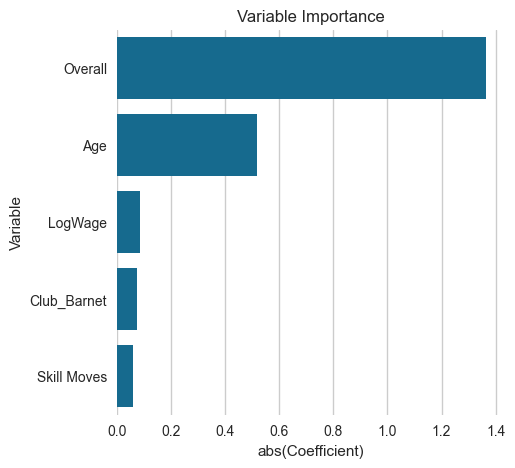

In [25]:
coef = abs(model2[1].coef_)
indices = coef.argsort()[::-1][0:5]
f, ax = plt.subplots(figsize=(5, 5))
plt.title("Variable Importance")
sns.barplot(y=[list(Xtrain.columns)[i] for i in indices], x=coef[indices], label="Total", color="b")
ax.set(ylabel="Variable", xlabel="abs(Coefficient)")
sns.despine(left=True, bottom=True)

Q 1.9 - <span style="color:red">[4]</span> - Do the following:
-   instantiate an sklearn's random forest regressor with the default arguments except `n_jobs=-1,` and `random_state=seed` and name it `model3`, <span style="color:red">[0.5]</span>
-   run shuffled 5-split Kfold cross-validation on `model3` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score,  <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   how many trees this forest has? <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

In [27]:
model3 = RandomForestRegressor(
     n_jobs = -1,
     random_state = seed)

scores = cross_val_score(model3, Xtrain, ytrain, cv=cv, scoring = make_scorer(score))
print(f"Scores: {scores}")
print(f"Mean: {scores.mean()}, Std Dev: {scores.std()}")

fitted = model3.fit(Xtrain, ytrain)

print(f"Prediction RMSE: {score(ytrain, model3.predict(Xtrain))}")
print(f"Generalization RMSE: {score(ytest, model3.predict(Xtest))}")

print(f"Number of trees: {len(model3.estimators_)}")

Scores: [0.28240331 0.16424403 0.15848352 0.1635998  0.15636176]
Mean: 0.1850184826993178, Std Dev: 0.0487841265629358
Prediction RMSE: 0.06883107493004885
Generalization RMSE: 0.15948130676780703
Number of trees: 100


Q 1.10 - <span style="color:red">[2]</span> - Use the cross-validated grid search function to find the best possible values for `n_estimators` and `max_features` for the random forest. Here are the degrees of freedom to use: For `n_estimators` try `[50, 100, 150]`, and for `max_features` try every possible method.

Note: Only use 50% of total data (randomly sampled using the provided random seed) to fit the grid search function.

In [33]:
param_grid = dict({'n_estimators'  : [100, 150, 50],
                   'max_features': ['sqrt', 'log2', None],
                  })

subset = df.sample(frac = 0.5, random_state=seed)

GridTree = GridSearchCV(model3,        
                       param_grid,          # Parameter grid
                       cv = 5,      # Cross-validation object.  
                       scoring = 'neg_root_mean_squared_error', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

GridTree.fit(subset.drop(['LogValue'], axis=1), subset.LogValue)

GridTree.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


{'max_features': None, 'n_estimators': 150}

Q 1.11 - <span style="color:red">[4]</span> - Do the following:
-   Take the random forest again but this time use the best values found in the previous step (again with `n_jobs=-1,` and `random_state=seed`), and name it `model4`, <span style="color:red">[1]</span>
-   run shuffled 5-split Kfold cross-validation on `model4` and report the cross-validated RMSE of each split as well as their mean and standard deviation, <span style="color:red">[1]</span>
-   fit the model, <span style="color:red">[0.5]</span>
-   report prediction RMSE score, <span style="color:red">[0.5]</span>
-   report generalization RMSE score, <span style="color:red">[0.5]</span>
-   use `barplot` to generate a variable (or feature) importance diagram from this model (limit the plot to the top 5 features). <span style="color:red">[0.5]</span>

In [34]:
model4 = RandomForestRegressor(
     n_jobs = -1,
     random_state = seed,
     n_estimators = 150,
     max_features = None)

scores = cross_val_score(model4, Xtrain, ytrain, cv=cv, scoring = make_scorer(score))
print(f"Scores: {scores}")
print(f"Mean: {scores.mean()}, Std Dev: {scores.std()}")

fitted = model4.fit(Xtrain, ytrain)

print(f"Prediction RMSE: {score(ytrain, model4.predict(Xtrain))}")
print(f"Generalization RMSE: {score(ytest, model4.predict(Xtest))}")

Scores: [0.28035191 0.1639831  0.15531968 0.1617796  0.15642022]
Mean: 0.18357090200402562, Std Dev: 0.04849824352786759
Prediction RMSE: 0.06743442963795222
Generalization RMSE: 0.1589433771887264


Q 1.12 - <span style="color:red">[1]</span> - Based on your results, what features do you think are the most important ones? Which model do you trust for this purpose and why?

Q 1.13 - <span style="color:red">[1.5]</span> - If you are asked to choose one final model for production, which one would you select? Explain why? Note: To answer this, take computational complexity into account alongside other criteria.

Q 1.14 - <span style="color:red">[10]</span> - Take the dataframe that you set aside in **Question 1.6** for this question. With `International Reputation` as label attempt to do nonlinear dimension reduction using 3-component t-SNE with `learning_rate='auto'`, `init='random`, `perplexity=50`, `random_state=seed`, and `n_jobs=-1`. You will probably witness better separations with higher values of `n_iter`, however, for the sake of computation time do not go beyond 1500 . There is no deterministic outcome to expect from this question. As long as your implementation is correct, you should get the full mark. Treat this as an **unsupervised** task. Do the following:
-   instantiate a t-SNE model with proper arguments, <span style="color:red">[2]</span>
-   fit the model properly, <span style="color:red">[2]</span>
-   3D scatter plot the components that you get after dimension reduction and name the axes properly, <span style="color:red">[3]</span>
-   use the label to color code the data points in your 3D plot. <span style="color:red">[2]</span>
-   why t-SNE uses t-distribution and not Gaussian? <span style="color:red">[1]</span>

Note: If you do not know how to plot in 3D, do 2D for partial mark.

In [35]:
# From Lab 8

tSNEmapper = TSNE(n_components=3,               # How many dimensions to use. Never more than 2 or 3
                  init='random',                # First initialization. Sparse matrices need 'random'.  Otherwise use 'pca'
                  perplexity=50.0,             # Read below
                  learning_rate='auto',         # Related to above. Leave to auto
                  n_iter=1500,                  # Very important to let iterate enough
                  n_iter_without_progress=300,  # Set early stopping
                  metric='euclidean',           # Metric to use to calculate distances.
                  min_grad_norm=1e-7,           # Minimum gradient to continue iterating
                  verbose=0,                    # Verbosity
                  random_state=seed,            # Random seed
                  n_jobs=-1,                    # Parallel processes
                 )

TSNE_embedding = tSNEmapper.fit_transform(df)



NameError: name 'df1' is not defined

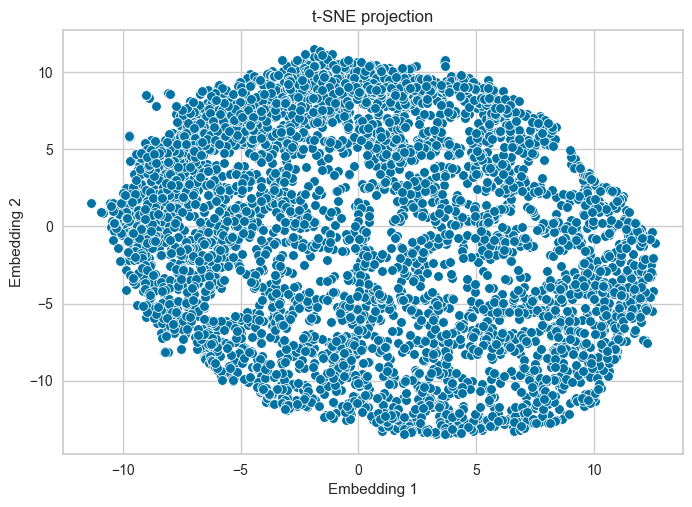

In [37]:
sns.scatterplot(x=TSNE_embedding[:, 0], y=TSNE_embedding[:, 1])
plt.xlabel("Embedding 1")
plt.ylabel("Embedding 2")
plt.title("t-SNE projection")
plt.show()

Q 1.15 - <span style="color:red">[5]</span> - Take the dataframe that you set aside in **Question 1.6** for this question. We want to do a classification with `'International Reputation'` as target class. This is going to be an imbalanced classification but we don't care. We are interested to see if can get a better accuracy score if we do some clustering as a preprocessing step. Do the following:
-   what would be the classification baseline accuracy for this dataframe? <span style="color:red">[1]</span>
-   use `train_test_split` with `random_state=seed` to set aside 20% of the data as test set, <span style="color:red">[0.5]</span>
-   instantiate a sklearn's stochastic gradient descent classifier with the proper solver for logistic regression and name it `clf`. Use elasticnet regularization with `l1_ratio` of 0.7. Set `max_iter=2000`, `tol=1e-3`, `n_jobs=-1`, `random_state=seed`, <span style="color:red">[2]</span>
-   run 5-split `StratifiedKFold` cross-validation on `clf` and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[1.5]</span>

In [40]:
cts = df['International Reputation'].value_counts()
print(f"Baseline Accuracy: {cts.iloc[0] / len(df)}")

X = df.drop('International Reputation', axis = 1)
y = df['International Reputation']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = seed)

clf = SGDClassifier(
        loss = 'log_loss',
        penalty = 'elasticnet',
        l1_ratio = 0.7,
        max_iter = 2000,
        tol = 1e-3,
        n_jobs = -1,
        random_state = seed
      )

cv_scores = cross_val_score(clf, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="accuracy")
print(f'List of CV scores:', cv_scores.round(3))
print(f"Average CV score: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

Baseline Accuracy: 0.8547827860493575
List of CV scores: [0.85  0.868 0.861 0.86  0.844]
Average CV score: 0.856 +/- 0.008


Q 1.16 - <span style="color:red">[8]</span> - Do the following:
-   bundle a 50-cluster `K-Means` (as a preprocessing step) and the `clf` into a pipeline. Set `random_state=seed` for `K-Means`, <span style="color:red">[3]</span>
-   run 5-split `StratifiedKFold` cross-validation on the pipeline and report the cross-validated **accuracy** of each fold as well as their mean and standard deviation, <span style="color:red">[2]</span>
-   do you find the added preprocessing step effective? why? <span style="color:red">[1]</span>
-   what transformations did the data undergo through this pipeline? <span style="color:red">[2]</span>


In [41]:
pipe = Pipeline([
    ('km', KMeans(n_clusters = 50, random_state = seed)),
    ('sgd', clf)
])

cv_scores = cross_val_score(pipe, Xtrain, ytrain, cv=StratifiedKFold(n_splits=5), n_jobs=-1, scoring="accuracy")
print(f'List of CV scores:', cv_scores.round(3))
print(f"Average CV score: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

List of CV scores: [0.864 0.869 0.838 0.865 0.879]
Average CV score: 0.863 +/- 0.014


---
## Question 2 - <span style="color:green">[40]</span> - Clustering 
For this question we use a modified dataset from UCI Machine Learning Datasets. The data contains selling features on a social media platform. Each record has information about the time the information was posted and engagements such as emotion.

Q 2.1 - <span style="color:red">[1]</span> - Load `dataset_2.csv` as a pandas dataframe, name it `df2`, and display its first 5 rows.

In [45]:
df2 = pd.read_csv('dataset_2.csv')

df2.head(5)

,ID,data_type,data_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


Q 2.2 - <span style="color:red">[8]</span> - Do the following:
-   How many observations and attributes do you see in the dataset? <span style="color:red">[1]</span>
-   Check for missing values and drop the columns that contain missing values. <span style="color:red">[1]</span>
-   Create a label encoder using `LabelEncoder` from sklearn and convert the categorical variable into numerics. <span style="color:red">[2]</span>
-   Keep a copy of the encoded version of `df2['data_type']` under a different name (*e.g.*, `y`) - you will need it in **Question 2.6** as true label. <span style="color:red">[1]</span>
-   Explain why it is a good idea to normalize the data for K-Means clustering. <span style="color:red">[1]</span>
-   Train a `MinMaxScaler` over the full dataset but not `y`. <span style="color:red">[2]</span>

In [46]:
print(f"There are {len(df2)} observations and {len(df2.columns)} attributes")
print(f"Are there any null values? {df2.isnull().any()}")

df2.drop(['data_published', 'ID'], axis=1, inplace=True)

X = df2
y = df2['data_type']
le = LabelEncoder()

X['data_type'] = le.fit_transform(X['data_type'])
y = le.transform(y)

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)
X.head()

There are 7050 observations and 12 attributes
Are there any null values? ID                False
data_type         False
data_published     True
num_reactions     False
num_comments      False
num_shares        False
num_likes         False
num_loves         False
num_wows          False
num_hahas         False
num_sads          False
num_angrys        False
dtype: bool


,data_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


Q 2.3 - <span style="color:red">[4]</span> - Now that the data is ready let's use `KMeans` with `random_state=seed` to plot k versus inertia for the model. Take k in `[2, 3, 4, 5, 6, 8]`.

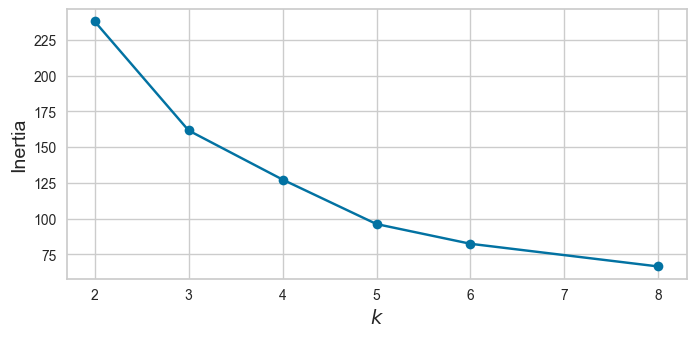

In [52]:
inertias = []
silhouettes = []
ks = [2,3,4,5,6,8]

# Fit clusterers
for k in ks:
    KClusterer = KMeans(n_clusters=k, random_state = seed).fit(X)
    
    inertias.append(KClusterer.inertia_)
    silhouettes.append(silhouette_score(X, KClusterer.predict(X)))
    
plt.figure(figsize=(8, 3.5))
plt.plot(ks, inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

Q 2.4 - <span style="color:red">[4]</span> - Plot k versus silhouette score for the model fit in the previous question.

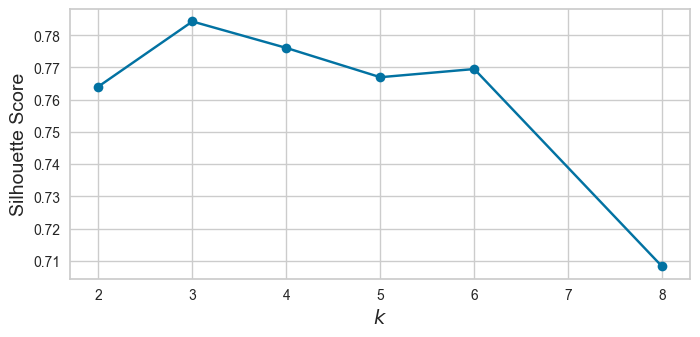

In [53]:
plt.figure(figsize=(8, 3.5))
plt.plot(ks, silhouettes, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.show()

Q 2.5 - <span style="color:red">[5]</span> - According to the plots of **Question 2.3** and **Question 2.4** select 4 values for k and generate Silhouette Diagrams for them.  

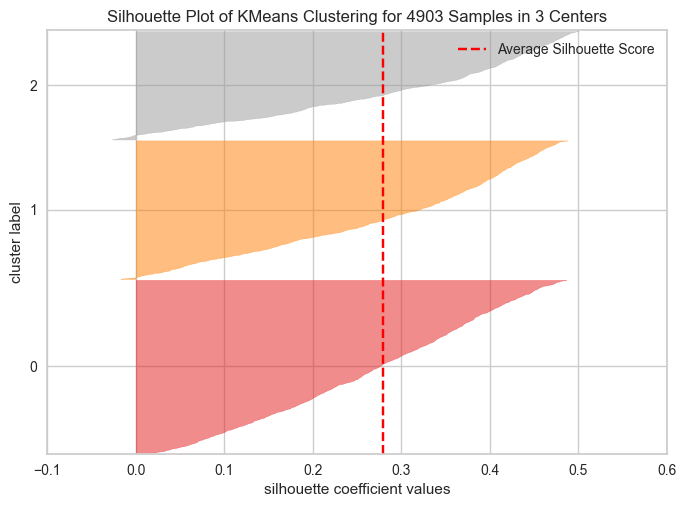

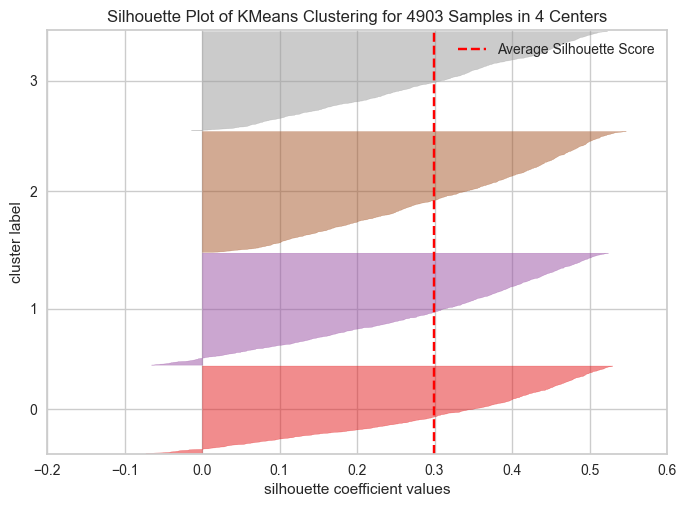

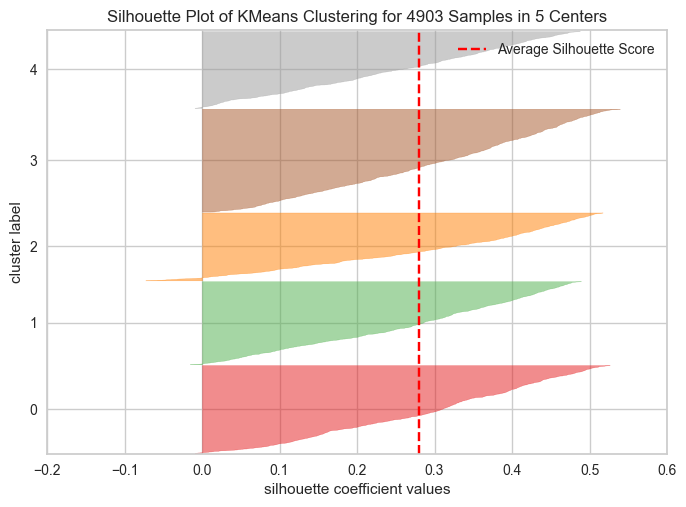

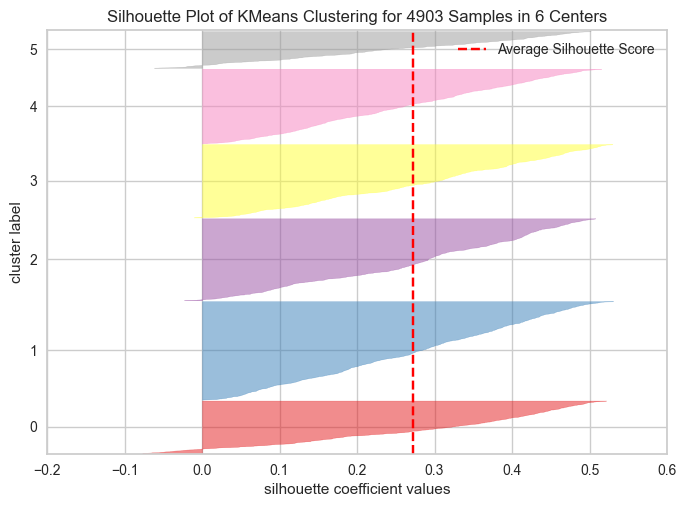

In [55]:
# 4 clusters

for k in [3,4,5,6]:
    KClusterer = KMeans(n_clusters = k, random_state=seed).fit(df)
    visualizer = SilhouetteVisualizer(KClusterer) # Get the kmeans model
    visualizer.fit(df) # Pass the scaled data
    visualizer.show() # show the plot

Q 2.6 - <span style="color:red">[5]</span> - Train the model (using the same seed) for the k's that you selected in the previous question and report the model accuracy per k. Hint: In order to calculate the number of correct cluster labels you can use the data that you set aside in **Question 2.2** as true label for this question.

Q 2.7 - <span style="color:red">[3]</span> - Based on the insights generated in **Question 2.3 - 2.6**, pick two values for **k**. Explain why and support your choices by the results.

Q 2.8 - <span style="color:red">[6]</span> - Do the following:
-   In **Question 2.2**, you used `MinMaxScaler`. This time, instead of `MinMaxScaler`, use the `StandardScaler()` to prepare the data once again. Train `KMeans` on this data with `random_state=seed` and number of clusters being equal to your first choice for **k**. <span style="color:red">[3]</span>
-   Apply a PCA transform to the data using 3 components and create a 3D scatter plot, differentiating data points by color. <span style="color:red">[3]</span>

Note: If you do not know how to plot in 3D, do 2D for partial mark.

Q 2.9 - <span style="color:red">[3]</span> - Retrain the `KMeans` with number of clusters being equal to your second choice for k, and again apply a PCA transform to the data using 3 components and create a 3D scatter plot, differentiating data points by color.

Note: If you do not know how to plot in 3D, do 2D for partial mark.

Q 2.10 - <span style="color:red">[1]</span> - After seeing the figures generated in **Question 2.8** and **2.9**, what value of **k** would be your ultimate choice? Explain. 

---
## Question 3 - <span style="color:green">[10 Bonus]</span> - ANN
Let's use the same dataset as **Question 1** to train an ANN to predict players values. You can use either PyTorch or TensorFlow.  

Q 3.1 - <span style="color:red">[2]</span> - Load `dataset_1.csv` as a pandas dataframe, create the array of features `X` and target `y`. Use `train_test_split` with `random_state=seed,test_size=0.3` twice to get not only a training set and a test set but also a validation set. Use `StandardScaler()` to transform X's.

Q 3.2 - <span style="color:red">[3]</span> - Create an ANN with 4 layers:
-   An input layer with 500 nodes
-   A hidden layer with 100 nodes
-   Another hidden layer with 50 nodes
-   A single node output layer

It is up to you where and what type of activation function to use.

How many parameters your ANN must optimize?


Q 3.3 - <span style="color:red">[3]</span> - Choose `mean_squared_error` for loss and train the model (with `epochs=20`) over training and validation sets.

Q 3.4 - <span style="color:red">[1]</span> - Report both prediction and generalization loss of the model.

Q 3.5 - <span style="color:red">[1]</span> - Plot the learning curve *i.e.*, epoch vs training loss and validation loss.

---
# Warning!

Upload your complete notebook to the same place on OWL where you initially downloaded it. After uploading, click the "Submit for Grading" button and confirm. Late submissions are not allowed, so please start the submission process 10 minutes before the deadline.